In [1]:
import pandas as pd

# モデル学習・評価
1. データ読み込み
2. データ分割
3. モデル学習
4. モデル評価
5. csvファイル出力<br>
※ データ前処理は別のipynbファイルで実行すること<br>
※ ベースラインモデル用の最低限の前処理のみ実行

## 1.データの読込

In [114]:
# データの読込

# 訓練データ
train_df = pd.read_csv("../data/train.csv")

# テストデータ
test_df = pd.read_csv("../data/test.csv")

display(train_df.head())
display(test_df.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [115]:
print("訓練データ")
print("テーブルデータの形状")
print(train_df.shape)
print(train_df.info())

訓練データ
テーブルデータの形状
(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [116]:
print("テストデータ")
print("テーブルデータの形状")
print(test_df.shape)
print(test_df.info())

テストデータ
テーブルデータの形状
(4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


## ベースラインモデル用前処理
- 欠損値
- PassengerId：列削除
- HomePlanet：One-Hotエンコーディング
- CryoSleep：bool型 -> float型
- Cabin：列削除（One-hotエンコーディングできない）
- Destination：OneHotエンコーディング
- VIP：bool型 -> float型
- Name：列削除

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
"""
欠損値削除
"""
# 削除しない場合（上から実行できるように）
train_df_dropped = train_df.copy()
test_df_dropped = test_df.copy()

# 欠損値を含む行の削除
    # pd.concatはindexが一致していないといけないため、削除後にリセット
# train_df_dropped = train_df.dropna().reset_index(drop=True)
# test_df_dropped = test_df.dropna().reset_index(drop=True)

In [119]:
"""
One-Hotエンコーディング
"""
# One-hotエンコーディング対象の説明変数
target_feat = ["HomePlanet", "Destination"]

# インスタンス作成
    # drop='first'で1つのカテゴリを除外
one_enc = OneHotEncoder(drop='first', sparse_output=False)

# エンコーディング（出力 np.ndarray)
train_encoded = one_enc.fit_transform(train_df_dropped[target_feat])
test_encoded = one_enc.transform(test_df_dropped[target_feat])

# データフレーム作成（エンコーディングされたデータのみ）
train_df_encoded = pd.DataFrame(data=train_encoded, columns=one_enc.get_feature_names_out())
test_df_encoded = pd.DataFrame(data=test_encoded, columns=one_enc.get_feature_names_out())

In [120]:
print(train_df_encoded.shape, train_df_dropped.shape)

(8693, 6) (8693, 14)


In [123]:
train_df_encoded["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [121]:
# データフレーム結合
train_df_encoded = pd.concat([train_df_dropped.drop(columns=target_feat), train_df_encoded], axis=1)
test_df_encoded = pd.concat([test_df_dropped.drop(columns=target_feat), test_df_encoded], axis=1)

In [124]:
"""
bool型 -> float型
"""

# CryoSleep
train_df_encoded["CryoSleep"] = train_df_encoded["CryoSleep"].astype(float)
test_df_encoded["CryoSleep"] = test_df_encoded["CryoSleep"].astype(float)

# VIP
train_df_encoded["VIP"] = train_df_encoded["VIP"].astype(float)
test_df_encoded["VIP"] = test_df_encoded["VIP"].astype(float)

# Transported
train_df_encoded["Transported"] = train_df_encoded["Transported"].astype(float)

In [125]:
"""
列削除
"""

remove_feat = ["Name", "Cabin", "PassengerId"]

train_df_encoded = train_df_encoded.drop(columns=remove_feat)
test_df_encoded = test_df_encoded.drop(columns=remove_feat)

In [126]:
print(train_df_encoded.shape, test_df_encoded.shape)

(8693, 15) (4277, 14)


## 2. データ分割

In [88]:
from sklearn.model_selection import train_test_split

In [127]:
# 説明変数と目的変数に分割
X = train_df_encoded.drop(columns=["Transported"])
y = train_df_encoded["Transported"]

# 訓練データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [128]:
print(X_train.shape, X_test.shape)

(6954, 14) (1739, 14)


## 3. モデル学習

### LightGBM

In [129]:
import lightgbm as lgb

In [130]:
# インスタンス作成
model = lgb.LGBMClassifier(
    n_estimators=10000,
    random_state=42,
    objective="binary"
)

# 学習
model.fit(
    X_train,
    y_train,
    eval_metric="accuracy",
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(10)
    ]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.489362
[20]	valid_0's binary_logloss: 0.445826
[30]	valid_0's binary_logloss: 0.433338
[40]	valid_0's binary_logloss: 0.429922
[50]	valid_0's binary_logloss: 0.429079
[60]	valid_0's binary_logloss: 0.430051
[70]	valid_0's binary_logloss: 0.431136
[80]	valid

LGBMClassifier(n_estimators=10000, objective='binary', random_state=42)

### Oputunaを用いたハイパラチューニング

In [141]:
import optuna

from sklearn.metrics import accuracy_score

In [156]:
"""ナイーブな実装"""

# 目的関数の定義
def objective(trial):

    # チューニングするハイパーパラメータの設定
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 3, 50),
        "max_depth": trial.suggest_int("max_depth", 2, 50),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),  # 説明変数のサブサンプリング率
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),  # データのサブサンプリング率
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),                # バギングの頻度
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
    }

    # LightGBMモデルの構築
    model_optuna = lgb.LGBMClassifier(**params, random_state=42)

    # 学習（ハイパラ探索）
    model_optuna.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=True),
            lgb.log_evaluation(10)
        ],
    )

    # 予測
    y_pred = model_optuna.predict(X_test)

    # accuracyの計算
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)

    return acc

# Optunaによる最適化の実行
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# 最適なパラメータの表示
print(study.best_params)

[I 2024-09-15 16:12:41,035] A new study created in memory with name: no-name-fcb5e964-47c7-46ac-be8b-01df16f7ed6f
[I 2024-09-15 16:12:41,234] Trial 0 finished with value: 0.7981598619896493 and parameters: {'learning_rate': 0.24343641536936395, 'num_leaves': 46, 'max_depth': 48, 'feature_fraction': 0.6196106887796843, 'bagging_fraction': 0.6609144614015781, 'bagging_freq': 5, 'reg_alpha': 3.1096871093692124, 'reg_lambda': 1.7036214018813385}. Best is trial 0 with value: 0.7981598619896493.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6196106887796843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6196106887796843
[LightGBM] [Warning] bagging_fraction is set=0.6609144614015781, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6609144614015781
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6196106887796843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6196106887796843
[LightGBM] [Warning] bagging_fraction is set=0.6609144614015781, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6609144614015781
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing r

[I 2024-09-15 16:12:41,301] Trial 1 finished with value: 0.7906843013225991 and parameters: {'learning_rate': 0.25136837083173136, 'num_leaves': 14, 'max_depth': 9, 'feature_fraction': 0.5529048056537172, 'bagging_fraction': 0.5052852013859401, 'bagging_freq': 7, 'reg_alpha': 3.5259712923005857, 'reg_lambda': 4.104073503660407}. Best is trial 0 with value: 0.7981598619896493.


[60]	valid_0's binary_logloss: 0.433054
[70]	valid_0's binary_logloss: 0.434356
[80]	valid_0's binary_logloss: 0.434848
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.432713
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5529048056537172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5529048056537172
[LightGBM] [Warning] bagging_fraction is set=0.5052852013859401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5052852013859401
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5748074149123061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748074149123061
[LightGBM] [Warning] bagging_fraction is set=0.8430724336393111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8430

[I 2024-09-15 16:12:41,573] Trial 2 finished with value: 0.78953421506613 and parameters: {'learning_rate': 0.41656282322951665, 'num_leaves': 47, 'max_depth': 21, 'feature_fraction': 0.5748074149123061, 'bagging_fraction': 0.8430724336393111, 'bagging_freq': 2, 'reg_alpha': 2.103976041986222, 'reg_lambda': 3.936610408375307}. Best is trial 0 with value: 0.7981598619896493.
[I 2024-09-15 16:12:41,692] Trial 3 finished with value: 0.7952846463484762 and parameters: {'learning_rate': 0.20495407349696043, 'num_leaves': 17, 'max_depth': 39, 'feature_fraction': 0.7814174274726509, 'bagging_fraction': 0.4162716827527385, 'bagging_freq': 6, 'reg_alpha': 1.7909656971177128, 'reg_lambda': 2.7567251087648814}. Best is trial 0 with value: 0.7981598619896493.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.448624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.452496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.45355
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.438007
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5748074149123061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748074149123061
[LightGBM] [Warning] bagging_fraction is set=0.8430724336393111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8430724336393111
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagg

[I 2024-09-15 16:12:41,757] Trial 4 finished with value: 0.7952846463484762 and parameters: {'learning_rate': 0.3994182325542404, 'num_leaves': 18, 'max_depth': 49, 'feature_fraction': 0.6994165429399898, 'bagging_fraction': 0.8852207083049848, 'bagging_freq': 1, 'reg_alpha': 1.2187020744066572, 'reg_lambda': 4.047719943570371}. Best is trial 0 with value: 0.7981598619896493.
[I 2024-09-15 16:12:41,861] Trial 5 finished with value: 0.7958596894767107 and parameters: {'learning_rate': 0.40734843496269824, 'num_leaves': 48, 'max_depth': 17, 'feature_fraction': 0.5185540967088182, 'bagging_fraction': 0.581807003574495, 'bagging_freq': 2, 'reg_alpha': 4.238285798851091, 'reg_lambda': 4.122068292536143}. Best is trial 0 with value: 0.7981598619896493.


[30]	valid_0's binary_logloss: 0.431431
[40]	valid_0's binary_logloss: 0.43649
[50]	valid_0's binary_logloss: 0.441726
[60]	valid_0's binary_logloss: 0.44808
[70]	valid_0's binary_logloss: 0.451707
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.428913
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6994165429399898, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6994165429399898
[LightGBM] [Warning] bagging_fraction is set=0.8852207083049848, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8852207083049848
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5185540967088182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5185540967088182
[LightGBM] [Warning] bagging_fraction is set=0.581807003

[I 2024-09-15 16:12:41,975] Trial 6 finished with value: 0.7975848188614146 and parameters: {'learning_rate': 0.23816853088145917, 'num_leaves': 17, 'max_depth': 44, 'feature_fraction': 0.4849531760354396, 'bagging_fraction': 0.6711997338543005, 'bagging_freq': 2, 'reg_alpha': 1.68091624529122, 'reg_lambda': 1.511706619984707}. Best is trial 0 with value: 0.7981598619896493.
[I 2024-09-15 16:12:42,052] Trial 7 finished with value: 0.7964347326049454 and parameters: {'learning_rate': 0.3247470535081455, 'num_leaves': 22, 'max_depth': 50, 'feature_fraction': 0.6179720321152294, 'bagging_fraction': 0.6427706677768307, 'bagging_freq': 4, 'reg_alpha': 3.2921206342546974, 'reg_lambda': 3.462360079469346}. Best is trial 0 with value: 0.7981598619896493.


[40]	valid_0's binary_logloss: 0.43338
[50]	valid_0's binary_logloss: 0.435661
[60]	valid_0's binary_logloss: 0.436101
[70]	valid_0's binary_logloss: 0.437452
[80]	valid_0's binary_logloss: 0.440083
[90]	valid_0's binary_logloss: 0.440904
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.43338
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4849531760354396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4849531760354396
[LightGBM] [Warning] bagging_fraction is set=0.6711997338543005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6711997338543005
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6179720321152294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6179720321152294
[LightGBM] [Warn

[I 2024-09-15 16:12:42,240] Trial 8 finished with value: 0.7993099482461185 and parameters: {'learning_rate': 0.12413919861138131, 'num_leaves': 26, 'max_depth': 39, 'feature_fraction': 0.602763001224716, 'bagging_fraction': 0.9670459837682001, 'bagging_freq': 2, 'reg_alpha': 3.9700346759337175, 'reg_lambda': 3.304462891496364}. Best is trial 8 with value: 0.7993099482461185.
[I 2024-09-15 16:12:42,321] Trial 9 finished with value: 0.8004600345025877 and parameters: {'learning_rate': 0.12835723047854314, 'num_leaves': 13, 'max_depth': 4, 'feature_fraction': 0.6336048011429356, 'bagging_fraction': 0.4972848368017295, 'bagging_freq': 2, 'reg_alpha': 1.3434123570751404, 'reg_lambda': 1.5805952934171215}. Best is trial 9 with value: 0.8004600345025877.


[50]	valid_0's binary_logloss: 0.431475
[60]	valid_0's binary_logloss: 0.429655
[70]	valid_0's binary_logloss: 0.428707
[80]	valid_0's binary_logloss: 0.428828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_logloss: 0.428727
[100]	valid_0's binary_logloss: 0.429463
Did not meet early stopping. Best iteration is:
[87]	valid_0's binary_logloss: 0.428424
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.602763001224716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.602763001224716
[LightGBM] [Warning] bagging_fraction is set=0.9670459837682001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9670459837682001
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6336048011429356, colsample_bytree

[I 2024-09-15 16:12:42,401] Trial 10 finished with value: 0.7331799884991375 and parameters: {'learning_rate': 0.013373323008326901, 'num_leaves': 4, 'max_depth': 2, 'feature_fraction': 0.980319204966746, 'bagging_fraction': 0.40222339729229, 'bagging_freq': 4, 'reg_alpha': 0.21908808560338278, 'reg_lambda': 0.08687980748952362}. Best is trial 9 with value: 0.8004600345025877.
[I 2024-09-15 16:12:42,555] Trial 11 finished with value: 0.7998849913743531 and parameters: {'learning_rate': 0.09491973856954203, 'num_leaves': 32, 'max_depth': 32, 'feature_fraction': 0.4132942741060618, 'bagging_fraction': 0.9682375609466001, 'bagging_freq': 3, 'reg_alpha': 4.484792779499331, 'reg_lambda': 2.2548191943388662}. Best is trial 9 with value: 0.8004600345025877.


[60]	valid_0's binary_logloss: 0.580292
[70]	valid_0's binary_logloss: 0.570397
[80]	valid_0's binary_logloss: 0.560763
[90]	valid_0's binary_logloss: 0.552598
[100]	valid_0's binary_logloss: 0.544307
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.544307
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.980319204966746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.980319204966746
[LightGBM] [Warning] bagging_fraction is set=0.40222339729229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40222339729229
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4132942741060618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4132942741060618
[LightGBM] [Warning] bagging_fraction is set=

[I 2024-09-15 16:12:42,763] Trial 12 finished with value: 0.7952846463484762 and parameters: {'learning_rate': 0.09531969566573248, 'num_leaves': 35, 'max_depth': 30, 'feature_fraction': 0.42325851144714666, 'bagging_fraction': 0.7994227132535321, 'bagging_freq': 3, 'reg_alpha': 0.6333245704162409, 'reg_lambda': 1.747539777391556}. Best is trial 9 with value: 0.8004600345025877.


Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's binary_logloss: 0.541996
[20]	valid_0's binary_logloss: 0.490287
[30]	valid_0's binary_logloss: 0.463901
[40]	valid_0's binary_logloss: 0.451106
[50]	valid_0's binary_logloss: 0.443527
[60]	valid_0's binary_logloss: 0.437573
[70]	valid_0's binary_logloss: 0.434736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.432757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_logloss: 0.430222
[100]	valid_0's binary_logloss: 0.430659
Did not meet early stopping. Best iteration is:
[95]	valid_0's binary_logloss: 0.430031
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.42325851144714666, colsample_bytree=1.0 will be ignored. Current value

[I 2024-09-15 16:12:43,026] Trial 13 finished with value: 0.7998849913743531 and parameters: {'learning_rate': 0.1339293330775634, 'num_leaves': 35, 'max_depth': 30, 'feature_fraction': 0.8013087091724562, 'bagging_fraction': 0.7662621226788848, 'bagging_freq': 3, 'reg_alpha': 2.8896647103052135, 'reg_lambda': 1.053389970443917}. Best is trial 9 with value: 0.8004600345025877.
[I 2024-09-15 16:12:43,094] Trial 14 finished with value: 0.7912593444508338 and parameters: {'learning_rate': 0.04636135219008433, 'num_leaves': 6, 'max_depth': 12, 'feature_fraction': 0.4114473018778814, 'bagging_fraction': 0.5337084491557715, 'bagging_freq': 1, 'reg_alpha': 4.992150427017119, 'reg_lambda': 2.281286308032932}. Best is trial 9 with value: 0.8004600345025877.


[80]	valid_0's binary_logloss: 0.434509
[90]	valid_0's binary_logloss: 0.4359
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.431615
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8013087091724562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8013087091724562
[LightGBM] [Warning] bagging_fraction is set=0.7662621226788848, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7662621226788848
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4114473018778814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4114473018778814
[LightGBM] [Warning] bagging_fraction is set=0.5337084491557715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5337084491557715
[LightGBM] [Warning] Found wh

[I 2024-09-15 16:12:43,244] Trial 15 finished with value: 0.7987349051178838 and parameters: {'learning_rate': 0.16413266962110504, 'num_leaves': 34, 'max_depth': 27, 'feature_fraction': 0.9048483769731483, 'bagging_fraction': 0.9450067554019473, 'bagging_freq': 3, 'reg_alpha': 0.9934151341450196, 'reg_lambda': 0.5412094622942303}. Best is trial 9 with value: 0.8004600345025877.
[I 2024-09-15 16:12:43,329] Trial 16 finished with value: 0.7987349051178838 and parameters: {'learning_rate': 0.08554525079832609, 'num_leaves': 10, 'max_depth': 37, 'feature_fraction': 0.6764675586660245, 'bagging_fraction': 0.745097969260198, 'bagging_freq': 5, 'reg_alpha': 2.455181364701893, 'reg_lambda': 2.3755019011902334}. Best is trial 9 with value: 0.8004600345025877.


[60]	valid_0's binary_logloss: 0.434798
[70]	valid_0's binary_logloss: 0.437568
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.427677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9048483769731483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9048483769731483
[LightGBM] [Warning] bagging_fraction is set=0.9450067554019473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9450067554019473
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6764675586660245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6764675586660245
[LightGBM] [Warning] bagging_fraction is set=0.745097969260198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.745097969260198
[LightGBM] [Warning] Found wh

[I 2024-09-15 16:12:43,463] Trial 17 finished with value: 0.7993099482461185 and parameters: {'learning_rate': 0.17438497642646145, 'num_leaves': 41, 'max_depth': 22, 'feature_fraction': 0.7612082490879875, 'bagging_fraction': 0.48585455916330356, 'bagging_freq': 3, 'reg_alpha': 4.958252445606299, 'reg_lambda': 0.9844668656084168}. Best is trial 9 with value: 0.8004600345025877.
[I 2024-09-15 16:12:43,559] Trial 18 finished with value: 0.7981598619896493 and parameters: {'learning_rate': 0.3098690180044936, 'num_leaves': 29, 'max_depth': 4, 'feature_fraction': 0.493583939218657, 'bagging_fraction': 0.5910585549472728, 'bagging_freq': 1, 'reg_alpha': 0.00496209609048659, 'reg_lambda': 4.964506961626865}. Best is trial 9 with value: 0.8004600345025877.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.430154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.429832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2024-09-15 16:12:43,776] Trial 19 finished with value: 0.7964347326049454 and parameters: {'learning_rate': 0.05662608856375647, 'num_leaves': 28, 'max_depth': 34, 'feature_fraction': 0.8609416294710073, 'bagging_fraction': 0.8860913099010237, 'bagging_freq': 5, 'reg_alpha': 4.36535145921599, 'reg_lambda': 2.8411904586891326}. Best is trial 9 with value: 0.8004600345025877.


[30]	valid_0's binary_logloss: 0.469928
[40]	valid_0's binary_logloss: 0.453473
[50]	valid_0's binary_logloss: 0.44357
[60]	valid_0's binary_logloss: 0.438146
[70]	valid_0's binary_logloss: 0.434151
[80]	valid_0's binary_logloss: 0.431906
[90]	valid_0's binary_logloss: 0.431211
[100]	valid_0's binary_logloss: 0.430313
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.430313
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8609416294710073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8609416294710073
[LightGBM] [Warning] bagging_fraction is set=0.8860913099010237, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8860913099010237
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4559011178684571, colsample

[I 2024-09-15 16:12:43,905] Trial 20 finished with value: 0.7998849913743531 and parameters: {'learning_rate': 0.3119071656021252, 'num_leaves': 23, 'max_depth': 15, 'feature_fraction': 0.4559011178684571, 'bagging_fraction': 0.7261176325440594, 'bagging_freq': 4, 'reg_alpha': 2.515561248746857, 'reg_lambda': 2.063802907017361}. Best is trial 9 with value: 0.8004600345025877.


[20]	valid_0's binary_logloss: 0.437536
[30]	valid_0's binary_logloss: 0.431953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.431839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.432089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.434369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.436882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.438003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.431073
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [

[I 2024-09-15 16:12:44,073] Trial 21 finished with value: 0.7958596894767107 and parameters: {'learning_rate': 0.1488074514964846, 'num_leaves': 36, 'max_depth': 31, 'feature_fraction': 0.7730442150494553, 'bagging_fraction': 0.997863768106885, 'bagging_freq': 3, 'reg_alpha': 2.731060722462664, 'reg_lambda': 1.159060701851795}. Best is trial 9 with value: 0.8004600345025877.
[I 2024-09-15 16:12:44,227] Trial 22 finished with value: 0.7975848188614146 and parameters: {'learning_rate': 0.49567703942395397, 'num_leaves': 40, 'max_depth': 23, 'feature_fraction': 0.8211948117710259, 'bagging_fraction': 0.7709210977535096, 'bagging_freq': 3, 'reg_alpha': 1.4138956070193447, 'reg_lambda': 1.0341803790967126}. Best is trial 9 with value: 0.8004600345025877.


[70]	valid_0's binary_logloss: 0.434891
[80]	valid_0's binary_logloss: 0.435674
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.429752
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7730442150494553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7730442150494553
[LightGBM] [Warning] bagging_fraction is set=0.997863768106885, subsample=1.0 will be ignored. Current value: bagging_fraction=0.997863768106885
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8211948117710259, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8211948117710259
[LightGBM] [Warning] bagging_fraction is set=0.7709210977535096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7709210977535096
[LightGBM] [Warning] Found wh

[I 2024-09-15 16:12:44,406] Trial 23 finished with value: 0.8016101207590569 and parameters: {'learning_rate': 0.11447356928973329, 'num_leaves': 32, 'max_depth': 27, 'feature_fraction': 0.6662043248690764, 'bagging_fraction': 0.833947003530417, 'bagging_freq': 2, 'reg_alpha': 3.752939145703917, 'reg_lambda': 0.4947205512050259}. Best is trial 23 with value: 0.8016101207590569.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6662043248690764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662043248690764
[LightGBM] [Warning] bagging_fraction is set=0.833947003530417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.833947003530417
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6662043248690764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662043248690764
[LightGBM] [Warning] bagging_fraction is set=0.833947003530417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.833947003530417
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-w

[I 2024-09-15 16:12:44,598] Trial 24 finished with value: 0.7975848188614146 and parameters: {'learning_rate': 0.09539496609187334, 'num_leaves': 30, 'max_depth': 26, 'feature_fraction': 0.6667274113259829, 'bagging_fraction': 0.9091063519296646, 'bagging_freq': 2, 'reg_alpha': 3.645085168086938, 'reg_lambda': 0.06174247022629081}. Best is trial 23 with value: 0.8016101207590569.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6667274113259829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6667274113259829
[LightGBM] [Warning] bagging_fraction is set=0.9091063519296646, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9091063519296646
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Training until validation s

[I 2024-09-15 16:12:44,789] Trial 25 finished with value: 0.7906843013225991 and parameters: {'learning_rate': 0.010003094997685119, 'num_leaves': 23, 'max_depth': 18, 'feature_fraction': 0.7235809991895957, 'bagging_fraction': 0.8243863981747346, 'bagging_freq': 1, 'reg_alpha': 4.709765993066032, 'reg_lambda': 0.5728966645899303}. Best is trial 23 with value: 0.8016101207590569.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's binary_logloss: 0.634776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.612692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.592478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.575454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.560077
[70]	valid_0's binary_logloss: 0.546761
[80]	valid_0's binary_logloss: 0.535616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_logloss: 0.525889
[100]	valid_0's binary_logloss: 0.516651
Did not meet early stopping. Best itera

[I 2024-09-15 16:12:44,945] Trial 26 finished with value: 0.8004600345025877 and parameters: {'learning_rate': 0.19226345583905943, 'num_leaves': 41, 'max_depth': 9, 'feature_fraction': 0.5475633866573466, 'bagging_fraction': 0.9329644779850916, 'bagging_freq': 2, 'reg_alpha': 3.986928980646065, 'reg_lambda': 0.5841692236923217}. Best is trial 23 with value: 0.8016101207590569.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.429539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.429392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2024-09-15 16:12:45,137] Trial 27 finished with value: 0.8010350776308223 and parameters: {'learning_rate': 0.1943409267973581, 'num_leaves': 41, 'max_depth': 7, 'feature_fraction': 0.654298021852333, 'bagging_fraction': 0.8496403146323455, 'bagging_freq': 2, 'reg_alpha': 4.039671835105261, 'reg_lambda': 0.5892889345437906}. Best is trial 23 with value: 0.8016101207590569.
[I 2024-09-15 16:12:45,278] Trial 28 finished with value: 0.8016101207590569 and parameters: {'learning_rate': 0.19581011254252, 'num_leaves': 39, 'max_depth': 9, 'feature_fraction': 0.6479490515057859, 'bagging_fraction': 0.8419188954570906, 'bagging_freq': 1, 'reg_alpha': 3.8900752511204564, 'reg_lambda': 1.3470684645366895}. Best is trial 23 with value: 0.8016101207590569.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.429458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-09-15 16:12:45,499] Trial 29 finished with value: 0.8010350776308223 and parameters: {'learning_rate': 0.21098895608665483, 'num_leaves': 44, 'max_depth': 9, 'feature_fraction': 0.7209597190621644, 'bagging_fraction': 0.8203743702079348, 'bagging_freq': 1, 'reg_alpha': 3.2856101611306343, 'reg_lambda': 0.3923046959174327}. Best is trial 23 with value: 0.8016101207590569.
[I 2024-09-15 16:12:45,609] Trial 30 finished with value: 0.8010350776308223 and parameters: {'learning_rate': 0.2816409289560778, 'num_leaves': 38, 'max_depth': 12, 'feature_fraction': 0.6504719790935114, 'bagging_fraction': 0.8622132795009099, 'bagging_freq': 1, 'reg_alpha': 3.7543281079675848, 'reg_lambda': 1.2863912306558003}. Best is trial 23 with value: 0.8016101207590569.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6504719790935114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504719790935114
[LightGBM] [Warning] bagging_fraction is set=0.8622132795009099, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8622132795009099
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6504719790935114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504719790935114
[LightGBM] [Warning] bagging_fraction is set=0.8622132795009099, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8622132795009099
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing r

[I 2024-09-15 16:12:45,804] Trial 31 finished with value: 0.8056354226566993 and parameters: {'learning_rate': 0.22383739419975893, 'num_leaves': 45, 'max_depth': 8, 'feature_fraction': 0.7456911683637082, 'bagging_fraction': 0.804730875535553, 'bagging_freq': 1, 'reg_alpha': 3.3363539782361515, 'reg_lambda': 0.3911610626569039}. Best is trial 31 with value: 0.8056354226566993.
[I 2024-09-15 16:12:45,917] Trial 32 finished with value: 0.80448533640023 and parameters: {'learning_rate': 0.2305583859219984, 'num_leaves': 50, 'max_depth': 7, 'feature_fraction': 0.7419332810016283, 'bagging_fraction': 0.7992032294028925, 'bagging_freq': 1, 'reg_alpha': 3.0506076364026367, 'reg_lambda': 0.7808995286887437}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.428866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.431992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2024-09-15 16:12:46,122] Trial 33 finished with value: 0.7993099482461185 and parameters: {'learning_rate': 0.24816157162941124, 'num_leaves': 50, 'max_depth': 13, 'feature_fraction': 0.7260320775012473, 'bagging_fraction': 0.6977766433173281, 'bagging_freq': 1, 'reg_alpha': 3.105819834056258, 'reg_lambda': 0.819241449949426}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7260320775012473, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7260320775012473
[LightGBM] [Warning] bagging_fraction is set=0.6977766433173281, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6977766433173281
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7260320775012473, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7260320775012473
[LightGBM] [Warning] bagging_fraction is set=0.6977766433173281, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6977766433173281
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing c

[I 2024-09-15 16:12:46,223] Trial 34 finished with value: 0.7958596894767107 and parameters: {'learning_rate': 0.23364478426183194, 'num_leaves': 46, 'max_depth': 6, 'feature_fraction': 0.8324275115656187, 'bagging_fraction': 0.7929089173071189, 'bagging_freq': 7, 'reg_alpha': 3.594834555677769, 'reg_lambda': 0.258104073557726}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8324275115656187, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324275115656187
[LightGBM] [Warning] bagging_fraction is set=0.7929089173071189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7929089173071189
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8324275115656187, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324275115656187
[LightGBM] [Warning] bagging_fraction is set=0.7929089173071189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7929089173071189
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing c

[I 2024-09-15 16:12:46,360] Trial 35 finished with value: 0.7975848188614146 and parameters: {'learning_rate': 0.2678388889743641, 'num_leaves': 44, 'max_depth': 20, 'feature_fraction': 0.5839288464203574, 'bagging_fraction': 0.7315291634166832, 'bagging_freq': 1, 'reg_alpha': 2.203650161014414, 'reg_lambda': 1.9413196452988526}. Best is trial 31 with value: 0.8056354226566993.
[I 2024-09-15 16:12:46,474] Trial 36 finished with value: 0.8016101207590569 and parameters: {'learning_rate': 0.3710964674362749, 'num_leaves': 50, 'max_depth': 9, 'feature_fraction': 0.695398653669678, 'bagging_fraction': 0.8554183864737789, 'bagging_freq': 6, 'reg_alpha': 3.34031261100871, 'reg_lambda': 0.8578131649047795}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.449543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.434781
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5839288464203574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5839288464203574
[LightGBM] [Warning] bagging_fraction is set=0.7315291634166832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7315291634166832
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.695398653669678, cols

[I 2024-09-15 16:12:46,611] Trial 37 finished with value: 0.8021851638872916 and parameters: {'learning_rate': 0.2133358932679286, 'num_leaves': 45, 'max_depth': 26, 'feature_fraction': 0.7402595656984484, 'bagging_fraction': 0.8975442471352618, 'bagging_freq': 1, 'reg_alpha': 2.9710887192035482, 'reg_lambda': 1.4333017990070627}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.429747
[50]	valid_0's binary_logloss: 0.432634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.436157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.439288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.442036
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.428151
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7402595656984484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7402595656984484
[LightGBM] [Warning] bagging_fraction is set=0.8975442471352618, subsample=1.0 will be i

[I 2024-09-15 16:12:46,818] Trial 38 finished with value: 0.8033352501437608 and parameters: {'learning_rate': 0.22465734926992637, 'num_leaves': 46, 'max_depth': 24, 'feature_fraction': 0.7473759297783147, 'bagging_fraction': 0.8860968616722452, 'bagging_freq': 2, 'reg_alpha': 2.9244268544361334, 'reg_lambda': 0.2564272267647363}. Best is trial 31 with value: 0.8056354226566993.


[50]	valid_0's binary_logloss: 0.437749
[60]	valid_0's binary_logloss: 0.440316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.444197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.446118
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.429856
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7473759297

[I 2024-09-15 16:12:46,970] Trial 39 finished with value: 0.7952846463484762 and parameters: {'learning_rate': 0.2900043295322086, 'num_leaves': 45, 'max_depth': 43, 'feature_fraction': 0.7419510486753791, 'bagging_fraction': 0.8983995845488992, 'bagging_freq': 1, 'reg_alpha': 2.890944406294885, 'reg_lambda': 0.2417194008595407}. Best is trial 31 with value: 0.8056354226566993.
[I 2024-09-15 16:12:47,098] Trial 40 finished with value: 0.79700977573318 and parameters: {'learning_rate': 0.34264148055455534, 'num_leaves': 48, 'max_depth': 17, 'feature_fraction': 0.8852908337513543, 'bagging_fraction': 0.7949708402899532, 'bagging_freq': 2, 'reg_alpha': 2.040117579394721, 'reg_lambda': 1.4264553822481287}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.451124
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.428405
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7419510486753791, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7419510486753791
[LightGBM] [Warning] bagging_fraction is set=0.8983995845488992, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8983995845488992
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8852908337513543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8852908337513543
[LightGBM] [Warning] bagging_fraction is set=0.7949708402899532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.794970840

[I 2024-09-15 16:12:47,240] Trial 41 finished with value: 0.7958596894767107 and parameters: {'learning_rate': 0.216625046716746, 'num_leaves': 43, 'max_depth': 25, 'feature_fraction': 0.7863747212145432, 'bagging_fraction': 0.9165376661374023, 'bagging_freq': 2, 'reg_alpha': 3.1018535187919576, 'reg_lambda': 0.7678217797517515}. Best is trial 31 with value: 0.8056354226566993.


[40]	valid_0's binary_logloss: 0.433222
[50]	valid_0's binary_logloss: 0.437591
[60]	valid_0's binary_logloss: 0.439571
[70]	valid_0's binary_logloss: 0.443356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.431188
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7863747212145432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7863747212145432
[LightGBM] [Warning] bagging_fraction is set=0.9165376661374023, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9165376661374023
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7555426320725174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7555426320725174
[LightGBM] [Warning

[I 2024-09-15 16:12:47,381] Trial 42 finished with value: 0.7998849913743531 and parameters: {'learning_rate': 0.2297639142693264, 'num_leaves': 48, 'max_depth': 28, 'feature_fraction': 0.7555426320725174, 'bagging_fraction': 0.8753224829723025, 'bagging_freq': 2, 'reg_alpha': 2.608659779313066, 'reg_lambda': 0.03430148244301584}. Best is trial 31 with value: 0.8056354226566993.
[I 2024-09-15 16:12:47,559] Trial 43 finished with value: 0.7929844738355377 and parameters: {'learning_rate': 0.17332626653038474, 'num_leaves': 50, 'max_depth': 35, 'feature_fraction': 0.7040207138292318, 'bagging_fraction': 0.8201416025475182, 'bagging_freq': 1, 'reg_alpha': 2.2810867185408705, 'reg_lambda': 0.35909726194841113}. Best is trial 31 with value: 0.8056354226566993.


Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.429508
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7555426320725174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7555426320725174
[LightGBM] [Warning] bagging_fraction is set=0.8753224829723025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8753224829723025
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7040207138292318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7040207138292318
[LightGBM] [Warning] bagging_fraction is set=0.8201416025475182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8201416025475182
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] baggin

[I 2024-09-15 16:12:47,720] Trial 44 finished with value: 0.7941345600920069 and parameters: {'learning_rate': 0.2602604045293608, 'num_leaves': 43, 'max_depth': 24, 'feature_fraction': 0.8139486327966683, 'bagging_fraction': 0.6820537701245741, 'bagging_freq': 2, 'reg_alpha': 3.4611029715517327, 'reg_lambda': 0.743006568188239}. Best is trial 31 with value: 0.8056354226566993.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's binary_logloss: 0.444529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's binary_logloss: 0.436163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.433326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-09-15 16:12:47,879] Trial 45 finished with value: 0.7993099482461185 and parameters: {'learning_rate': 0.1514232529785883, 'num_leaves': 47, 'max_depth': 19, 'feature_fraction': 0.688314148036382, 'bagging_fraction': 0.7641011838346272, 'bagging_freq': 1, 'reg_alpha': 2.924190837911346, 'reg_lambda': 1.7762984080311661}. Best is trial 31 with value: 0.8056354226566993.
[I 2024-09-15 16:12:47,939] Trial 46 finished with value: 0.7975848188614146 and parameters: {'learning_rate': 0.22388480455816415, 'num_leaves': 38, 'max_depth': 2, 'feature_fraction': 0.6104671067731784, 'bagging_fraction': 0.960362552560154, 'bagging_freq': 2, 'reg_alpha': 3.2140757871941585, 'reg_lambda': 0.3442019775768036}. Best is trial 31 with value: 0.8056354226566993.


[30]	valid_0's binary_logloss: 0.434033
[40]	valid_0's binary_logloss: 0.43293
[50]	valid_0's binary_logloss: 0.433466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.434325
[70]	valid_0's binary_logloss: 0.436384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.439136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_logloss: 0.439264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.432294
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.688314148036382, colsample_bytree=1.0 wil

[I 2024-09-15 16:12:48,072] Trial 47 finished with value: 0.7975848188614146 and parameters: {'learning_rate': 0.28925887046313775, 'num_leaves': 20, 'max_depth': 28, 'feature_fraction': 0.8435818352244899, 'bagging_fraction': 0.634227222825909, 'bagging_freq': 1, 'reg_alpha': 2.735956762848074, 'reg_lambda': 1.2003550677357202}. Best is trial 31 with value: 0.8056354226566993.


[30]	valid_0's binary_logloss: 0.436323
[40]	valid_0's binary_logloss: 0.439249
[50]	valid_0's binary_logloss: 0.441734
[60]	valid_0's binary_logloss: 0.446482
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.434413
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8435818352244899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8435818352244899
[LightGBM] [Warning] bagging_fraction is set=0.634227222825909, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634227222825909
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7903695449956957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7903695449956957
[LightGBM] [Warning] bagging_fraction is set=0.9956409145517564, subsample=1.0 will be ignored. 

[I 2024-09-15 16:12:48,230] Trial 48 finished with value: 0.8004600345025877 and parameters: {'learning_rate': 0.1214130048316689, 'num_leaves': 46, 'max_depth': 15, 'feature_fraction': 0.7903695449956957, 'bagging_fraction': 0.9956409145517564, 'bagging_freq': 2, 'reg_alpha': 1.9625623338901754, 'reg_lambda': 2.6643180568116875}. Best is trial 31 with value: 0.8056354226566993.
[I 2024-09-15 16:12:48,385] Trial 49 finished with value: 0.7981598619896493 and parameters: {'learning_rate': 0.2703566651530979, 'num_leaves': 26, 'max_depth': 21, 'feature_fraction': 0.9503321547955742, 'bagging_fraction': 0.9259407864260948, 'bagging_freq': 2, 'reg_alpha': 3.4668959125746266, 'reg_lambda': 1.5902782468821242}. Best is trial 31 with value: 0.8056354226566993.


[70]	valid_0's binary_logloss: 0.430306
[80]	valid_0's binary_logloss: 0.431848
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.4273
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7903695449956957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7903695449956957
[LightGBM] [Warning] bagging_fraction is set=0.9956409145517564, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9956409145517564
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9503321547955742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9503321547955742
[LightGBM] [Warning] bagging_fraction is set=0.9259407864260948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9259407864260948
[LightGBM] [Warning] Found wh

### Optunaで得られた最適なパラメータを用いたモデルの構築・学習

In [157]:
# モデル構築
best_model = lgb.LGBMClassifier(
    **study.best_params,
    n_estimators=10000,
    random_state=42,
    objective="binary"
)

# 学習
best_model.fit(
    X_train,
    y_train,
    eval_metric="accuracy",
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(10)
    ]
)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7456911683637082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7456911683637082
[LightGBM] [Warning] bagging_fraction is set=0.804730875535553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.804730875535553
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7456911683637082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7456911683637082
[LightGBM] [Warning] bagging_fraction is set=0.804730875535553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.804730875535553
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-w

LGBMClassifier(bagging_fraction=0.804730875535553, bagging_freq=1,
               feature_fraction=0.7456911683637082,
               learning_rate=0.22383739419975893, max_depth=8,
               n_estimators=10000, num_leaves=45, objective='binary',
               random_state=42, reg_alpha=3.3363539782361515,
               reg_lambda=0.3911610626569039)

## 4.モデル評価

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from sklearn.metrics import confusion_matrix

In [160]:
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)

print(f"モデル精度（Accuracy）：{acc}")

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7456911683637082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7456911683637082
[LightGBM] [Warning] bagging_fraction is set=0.804730875535553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.804730875535553
モデル精度（Accuracy）：0.8056354226566993


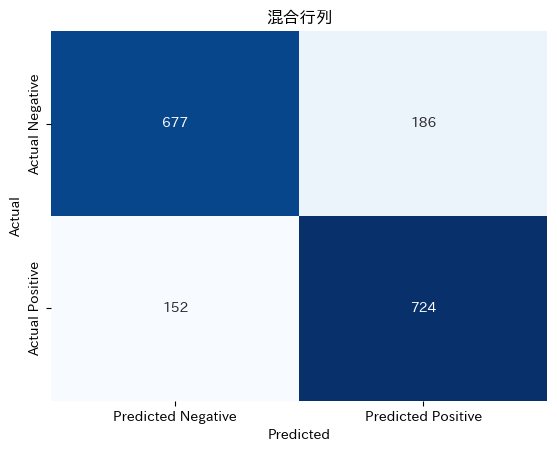

In [161]:
"""分類精度の可視化（ヒートマップ）"""
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# ヒートマップの描画
sns.heatmap(
    data=cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
)

plt.title("混合行列")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## 5. csvファイル出力

In [150]:
# テストデータに対する予測
y_pred = model.predict(test_df_encoded).astype(bool)

# 提出用データフレームの作成
submission_df = pd.DataFrame(
    {
        "PassengerId": test_df["PassengerId"],
        "Transported": y_pred,
    }
)

# 提出ファイルの作成
submission_df.to_csv("../submission/baseline_Optuna_Tuning.csv", index=False)

In [154]:
# モデルパラメータの保存
import json

file_name = "../params/baseline_Optuna_Tuning.json"

# ハイパーパラメータを取得
params = best_model.get_params()

# パラメータをJSON形式で保存
with open(file_name, 'w') as f:
    json.dump(params, f, indent=4)

print(f"パラメータが '{file_name}' に保存されました。")

パラメータが '../params/baseline_Optuna_Tuning.json' に保存されました。
